##Load Data Set

In [59]:
from pandas import read_csv

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Energy Meter.csv to Energy Meter.csv


In [60]:
url = "Energy Meter.csv"
names = ['Voltage', 'Current', 'Power', 'class']
dataset = read_csv(url, names=names)

##Summarize Data Set

In [61]:
dataset.shape

(400, 4)

In [62]:
dataset.head(20)

,Voltage,Current,Power,class
0,0.0000,0.0,0.0,NoLoad
1,0.0000,0.0,0.0,NoLoad
2,0.0000,0.0,0.0,NoLoad
3,0.0000,0.0,0.0,NoLoad
4,0.0000,0.0,0.0,NoLoad
5,0.0000,0.0,0.0,NoLoad
6,0.0000,0.0,0.0,NoLoad
7,0.3833,0.0,0.0,NoLoad
8,0.0000,0.0,0.0,NoLoad
9,0.0000,0.0,0.0,NoLoad


In [63]:
dataset.describe()

,Voltage,Current,Power
count,400.000000,400.000000,400.000000
mean,160.657320,0.317734,68.065053
std,93.125536,0.320430,68.941682
min,0.000000,0.000000,0.000000
25%,79.151450,0.076849,0.000000
50%,213.114800,0.176985,38.430426
75%,215.031300,0.398765,101.438042
max,304.340200,1.227349,264.859337


In [64]:
dataset.groupby('class').size()

class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64

##Visualize Data

In [65]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

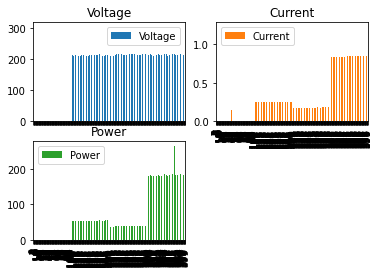

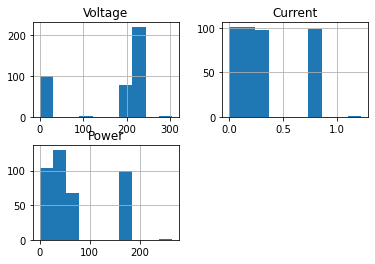

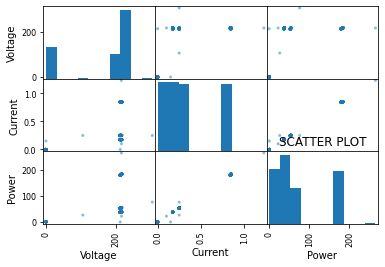

In [66]:
dataset.plot(kind = 'bar', subplots = True, layout = (2,2))
plt.title('BAR PLOT')

dataset.hist()
plt.title('HISTOGRAM PLOT')

scatter_matrix(dataset)
plt.title('SCATTER PLOT')
plt.show()

##Evaluate the various ML Algotrithms

In [67]:
#6 ML Algorithms and validation libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

##Segregate Input / Output Data

In [76]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle = True)

##Run Each Model Algorithm

In [77]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

##Validate the Models and Visualize the Results

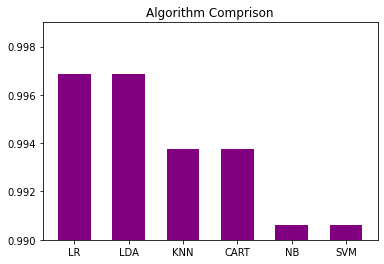

In [81]:
results = []
names = []
res = []
for name, model in models:
  kfold = StratifiedKFold(n_splits = 10, random_state = None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  '%s: %f (%f)' % (name, cv_results.mean(),cv_results.std())

  plt.ylim(.990, .999)
  plt.bar(names, res, color = 'purple', width = 0.6)

  plt.title('Algorithm Comprison')
  #plt.show()